In [2]:
# Useful imports
import numpy as np
import matplotlib.pyplot as plt

import camb # Import the CAMB module
from camb.symbolic import *

# CMB Parameter Sensitivity

The Standard Cosmological Model, i. e. the $\Lambda CDM$ model, is based on six foundamental parameters:
- $A_s$: scalar amplitude of the power spectrum of inial curvature;
- $n_s$: scalar spectral index of the power spectrum of inial curvature, which for perfect De Sitter expansion (exponensial growth) would exactly be 1;
- $\tau$: optical depth of the Universe, i.e. it accounts for how likely a photon may scatter in his path;
- $H_0$: value of the Hubble constant at the present epoch;
- $\Omega_bh^2$: baryon density parameter multiplied by the dimensioneless Hubble constant;
- $\Omega_ch^2$: cold dark matter density parameter multiplied by the dimensioneless Hubble constant;

In [3]:
# Set up a new set of parameters for CAMB using Planck 2018 cosmological parameters
pars = camb.read_ini('https://raw.githubusercontent.com/cmbant/CAMB/master/inifiles/planck_2018.ini')

In [4]:
# Calculate results for these parameters
results = camb.get_results(pars)

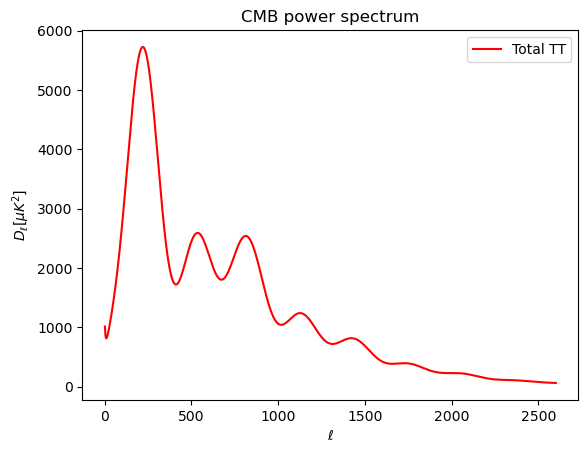

In [5]:
# Plot the CMB temperature power spectrum
powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
totCL=powers['total'] # Get the total CMB power spectrum
ells = np.arange(totCL.shape[0])

# Plot the CMB power spectrum
plt.figure()
plt.plot(ells[2:],totCL[2:,0], color='r', label='Total TT') # Taking from l=2 since l=0,1 are not physical
plt.legend()
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.title('CMB power spectrum')
plt.show()


Note that TT stands for Temperature - Temperature: it describes how the temperature fluctuations in the CMB are distributed across different angular scales. Essentially, it quantifies the variation in temperature as a function of scale.

Recall that:
$$
D_l = \frac{l(l+1)C_l}{2\pi}
$$

# WARNING

In [6]:
# Monopole and dipole aren't 0 by default????
print('Monopole:', totCL[0,0])
print('Dipole:', totCL[1,0])

Monopole: 0.0
Dipole: 0.0


In [7]:
'''
# Getting all the C_ls for the temperature power spectrum
C_l = results.get_cmb_power_spectra(pars, raw_cl=True)
'''

'\n# Getting all the C_ls for the temperature power spectrum\nC_l = results.get_cmb_power_spectra(pars, raw_cl=True)\n'

In [8]:
'''
C_ls = C_l['total']

# Plotting the C_ls
plt.figure()
plt.plot(ells, C_ls[:,0], label='TT')
plt.legend()
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}$')
plt.title('CMB power spectrum')
plt.show()
'''

"\nC_ls = C_l['total']\n\n# Plotting the C_ls\nplt.figure()\nplt.plot(ells, C_ls[:,0], label='TT')\nplt.legend()\nplt.xlabel(r'$\\ell$')\nplt.ylabel(r'$C_{\\ell}$')\nplt.title('CMB power spectrum')\nplt.show()\n"

In [9]:
# Contribution from ISW effect
pars1 = camb.read_ini('https://raw.githubusercontent.com/cmbant/CAMB/master/inifiles/planck_2018.ini')

pars1.SourceTerms.counts_ISW = False

In [10]:
results1 = camb.get_results(pars1)
powers1 = results1.get_cmb_power_spectra(pars1, CMB_unit='muK')
totCL1=powers1['total'] # Get the total CMB power spectrum

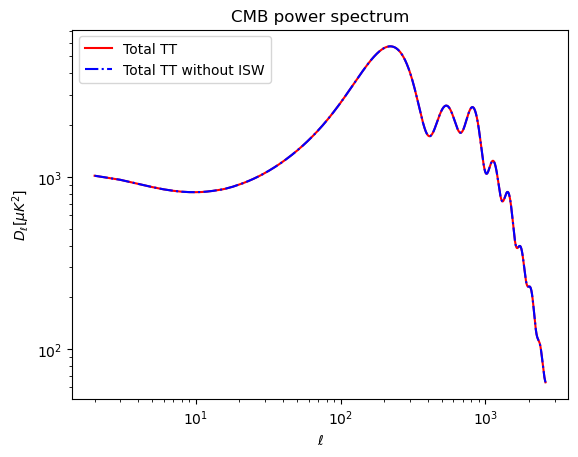

In [11]:
# Plot the CMB power spectrum VS the one without ISW effect
plt.figure()
plt.plot(ells[2:],totCL[2:,0], color='r', label='Total TT') 
plt.plot(ells[2:],totCL1[2:,0], color='b',ls = '-.',label='Total TT without ISW')
plt.legend()
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.title('CMB power spectrum')
plt.xscale('log')
plt.yscale('log')
plt.show()


In [12]:
# Monopole, dipole and ISW effects
monopole_source, ISW, doppler, quadrupole_source = get_scalar_temperature_sources()

In [13]:
early_ISW = sympy.Piecewise( (ISW, 1/a-1> 30),(0, True))  #redshift > 30
late_ISW = ISW - early_ISW

names = ['mon','ISW','eISW','LISW','dop', 'Q']
pars.set_custom_scalar_sources([monopole_source, ISW,early_ISW, late_ISW,doppler,quadrupole_source], 
        source_names =names)

data = camb.get_results(pars)
dic  = data.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

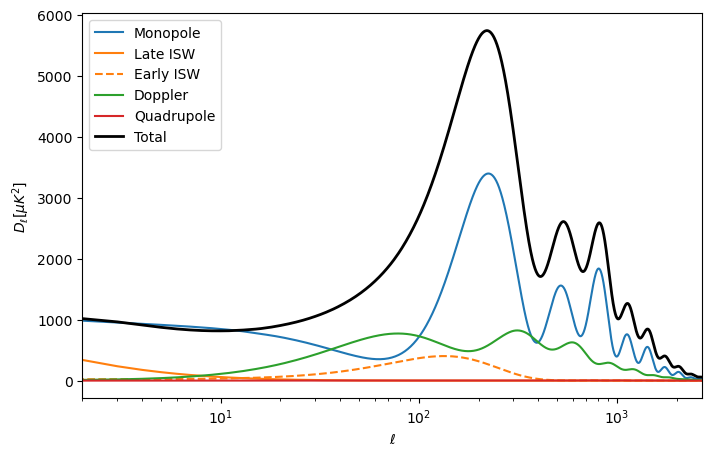

In [14]:
ls =np.arange(dic['TxT'].shape[0])
plt.figure(figsize=(8,5))
plt.semilogx(ls,dic['monxmon'], color='C0')
plt.semilogx(ls,dic['LISWxLISW'], color='C1')
plt.semilogx(ls,dic['eISWxeISW'], ls='--', color='C1')
plt.semilogx(ls,dic['dopxdop'],color='C2')
plt.semilogx(ls,dic['QxQ'], color='C3')
plt.semilogx(ls,dic['TxT'], lw=2, color='k')
plt.xlabel('$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.xlim(2, ls[-1])
plt.legend(['Monopole','Late ISW','Early ISW','Doppler','Quadrupole', 'Total'], loc = 'upper left');

# Variotion of Parameters

In [15]:
# Defining the standard set of parameters with Planck 2018 cosmological parameters
std_pars = camb.read_ini('https://raw.githubusercontent.com/cmbant/CAMB/master/inifiles/planck_2018.ini')

# Calculate results for these parameters
std_results = camb.get_results(std_pars)

# Computing the CMB power spectrum
std_powers = std_results.get_cmb_power_spectra(std_pars, CMB_unit='muK')
std_totCL=std_powers['total'] # Get the total CMB power spectrum
ells = np.arange(std_totCL.shape[0]) # Get the list of multipoles


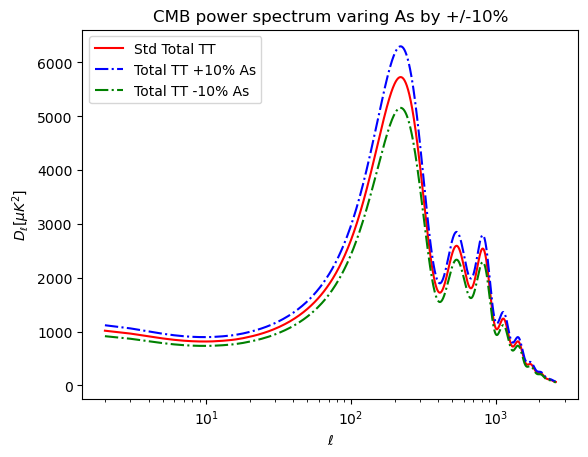

In [16]:
# Variang As by +/-10%
As_pars_plus  = camb.read_ini('https://raw.githubusercontent.com/cmbant/CAMB/master/inifiles/planck_2018.ini')
As_pars_minus = camb.read_ini('https://raw.githubusercontent.com/cmbant/CAMB/master/inifiles/planck_2018.ini')
As_pars_plus.InitPower.As *= 110./100.
As_pars_minus.InitPower.As *= 90./100.

# Calculate results for these parameters
As_results_plus = camb.get_results(As_pars_plus)
As_results_minus = camb.get_results(As_pars_minus)

# Computing the CMB temperature power spectrum for the modified parameters
var_powers_plus = As_results_plus.get_cmb_power_spectra(As_pars_plus, CMB_unit='muK')
var_powers_minus = As_results_minus.get_cmb_power_spectra(As_pars_minus, CMB_unit='muK')

# Get the total CMB power spectrum
var_totCL_plus = var_powers_plus['total']
var_totCL_minus = var_powers_minus['total']

# Plot the CMB power spectrum
plt.figure()
plt.plot(ells[2:],std_totCL[2:,0], color='r', label='Std Total TT') # Taking from l=2 since l=0,1 are not physical
plt.plot(ells[2:],var_totCL_plus[2:,0], color='b',ls = '-.',label='Total TT +10% As')
plt.plot(ells[2:],var_totCL_minus[2:,0], color='g',ls = '-.',label='Total TT -10% As')
plt.legend()
plt.xlabel(r'$\ell$')
plt.xscale('log')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.title('CMB power spectrum varing As by +/-10%')
plt.show()

**Varing As in the Power Spectrum:**
varing As, i.e. the scalar amplitude of primordial curvature, just modifies the overall amplitude of the fluctuations of the CMB.

In [17]:
# Monopole, dipole and ISW effects with varying As
As_pars_plus.set_custom_scalar_sources([monopole_source, ISW,early_ISW, late_ISW,doppler,quadrupole_source], 
        source_names =names)
As_pars_minus.set_custom_scalar_sources([monopole_source, ISW,early_ISW, late_ISW,doppler,quadrupole_source], 
        source_names =names)

As_data_plus = camb.get_results(As_pars_plus)
As_data_minus = camb.get_results(As_pars_minus)

As_dic_plus  = As_data_plus.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')
As_dic_minus = As_data_minus.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

Text(0.5, 1.0, 'Quadrupole effect')

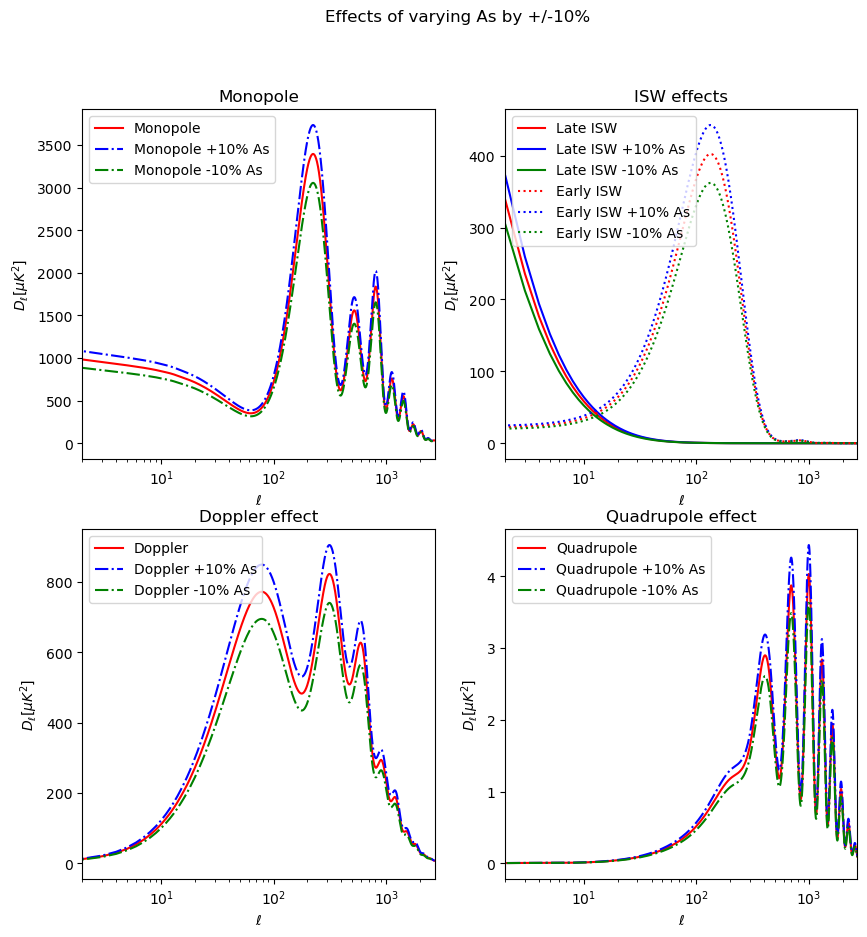

In [18]:
# PLots for the different effects having varied As by +/-10%

# Subplot for monopole
plt.subplots(2, 2, figsize=(10, 10))
plt.suptitle('Effects of varying As by +/-10%')
plt.subplot(221)
plt.semilogx(ls,dic['monxmon'], color='r')
plt.semilogx(ls,As_dic_plus['monxmon'], color='b',ls = '-.')
plt.semilogx(ls,As_dic_minus['monxmon'], color='g',ls = '-.')
plt.xlabel('$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.xlim(2, ls[-1])
plt.legend(['Monopole','Monopole +10% As','Monopole -10% As'], loc = 'upper left')
plt.title('Monopole')

# Subplot for ISW effects
plt.subplot(222)
plt.semilogx(ls,dic['LISWxLISW'], color='r', ls = '-')
plt.semilogx(ls,As_dic_plus['LISWxLISW'], color='b',ls = '-')
plt.semilogx(ls,As_dic_minus['LISWxLISW'], color='g',ls = '-')
plt.semilogx(ls,dic['eISWxeISW'], ls=':', color='r')
plt.semilogx(ls,As_dic_plus['eISWxeISW'], ls=':', color='b')
plt.semilogx(ls,As_dic_minus['eISWxeISW'], ls=':', color='g')
plt.xlabel('$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.xlim(2, ls[-1])
plt.legend(['Late ISW','Late ISW +10% As','Late ISW -10% As','Early ISW','Early ISW +10% As','Early ISW -10% As'], loc = 'upper left')
plt.title('ISW effects')

# Subplot for Doppler effect
plt.subplot(223)
plt.semilogx(ls,dic['dopxdop'],color='r')
plt.semilogx(ls,As_dic_plus['dopxdop'],color='b',ls = '-.')
plt.semilogx(ls,As_dic_minus['dopxdop'],color='g',ls = '-.')
plt.xlabel('$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.xlim(2, ls[-1])
plt.legend(['Doppler','Doppler +10% As','Doppler -10% As'], loc = 'upper left')
plt.title('Doppler effect')

# Subplot for Quadrupole effect
plt.subplot(224)
plt.semilogx(ls,dic['QxQ'], color='r')
plt.semilogx(ls,As_dic_plus['QxQ'], color='b',ls = '-.')
plt.semilogx(ls,As_dic_minus['QxQ'], color='g',ls = '-.')
plt.xlabel('$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.xlim(2, ls[-1])
plt.legend(['Quadrupole','Quadrupole +10% As','Quadrupole -10% As'], loc = 'upper left')
plt.title('Quadrupole effect')

**Varing As in the different effects of the Power Spectrum:** the previous considerations on the total power spectrum holds.

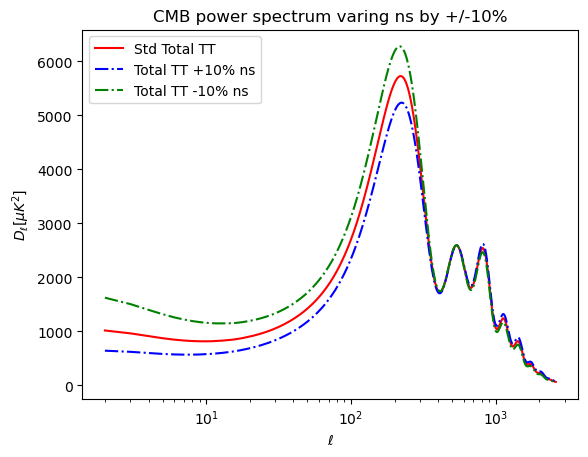

In [19]:
# Variang ns by +/-10%
ns_pars_plus  = camb.read_ini('https://raw.githubusercontent.com/cmbant/CAMB/master/inifiles/planck_2018.ini')
ns_pars_minus = camb.read_ini('https://raw.githubusercontent.com/cmbant/CAMB/master/inifiles/planck_2018.ini')
ns_pars_plus.InitPower.ns *= 110./100.
ns_pars_minus.InitPower.ns *= 90./100.

# Calculate results for these parameters
ns_results_plus = camb.get_results(ns_pars_plus)
ns_results_minus = camb.get_results(ns_pars_minus)

# Computing the CMB temperature power spectrum for the modified parameters
ns_powers_plus = ns_results_plus.get_cmb_power_spectra(ns_pars_plus, CMB_unit='muK')
ns_powers_minus = ns_results_minus.get_cmb_power_spectra(ns_pars_minus, CMB_unit='muK')

# Get the total CMB power spectrum
ns_totCL_plus = ns_powers_plus['total']
ns_totCL_minus = ns_powers_minus['total']

# Plot the CMB power spectrum
plt.figure()
plt.plot(ells[2:],std_totCL[2:,0], color='r', label='Std Total TT') # Taking from l=2 since l=0,1 are not physical
plt.plot(ells[2:],ns_totCL_plus[2:,0], color='b',ls = '-.',label='Total TT +10% ns')
plt.plot(ells[2:],ns_totCL_minus[2:,0], color='g',ls = '-.',label='Total TT -10% ns')
plt.legend()
plt.xlabel(r'$\ell$')
plt.xscale('log')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.title('CMB power spectrum varing ns by +/-10%')
plt.show()

**Varing ns in the Power Spectrum:** apparently, varing ns varies the relative power on small and large scales.

In [20]:
# PLots for the different effects having varied ns by +/-10%

ns_pars_plus.set_custom_scalar_sources([monopole_source, ISW,early_ISW, late_ISW,doppler,quadrupole_source],
        source_names =names)
ns_pars_minus.set_custom_scalar_sources([monopole_source, ISW,early_ISW, late_ISW,doppler,quadrupole_source],
        source_names =names)

ns_data_plus = camb.get_results(ns_pars_plus)
ns_data_minus = camb.get_results(ns_pars_minus)

ns_dic_plus  = ns_data_plus.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')
ns_dic_minus = ns_data_minus.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

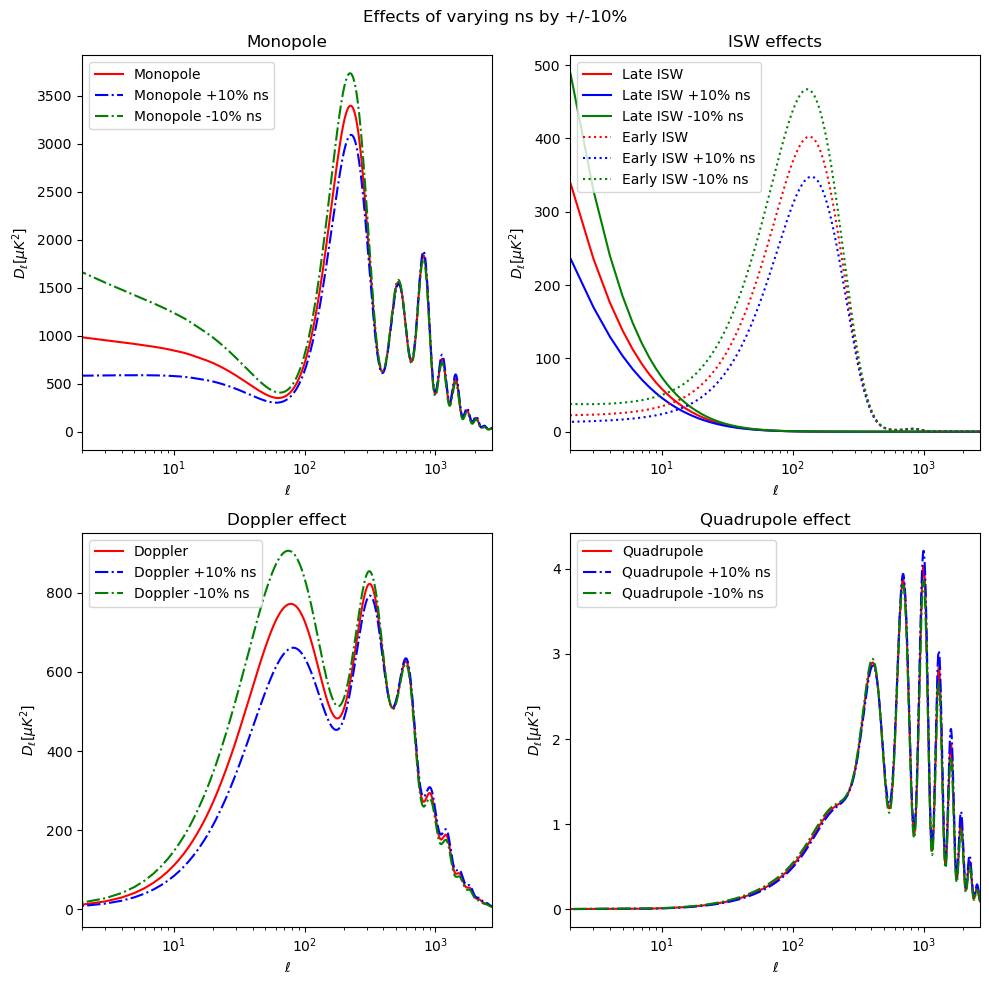

In [21]:
# PLots for the different effects having varied ns by +/-10%

# Subplot for monopole
plt.subplots(2, 2, figsize=(10, 10))
plt.suptitle('Effects of varying ns by +/-10%')

plt.subplot(221)
plt.semilogx(ls,dic['monxmon'], color='r')
plt.semilogx(ls,ns_dic_plus['monxmon'], color='b',ls = '-.')
plt.semilogx(ls,ns_dic_minus['monxmon'], color='g',ls = '-.')
plt.xlabel('$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.xlim(2, ls[-1])
plt.legend(['Monopole','Monopole +10% ns','Monopole -10% ns'], loc = 'upper left')
plt.title('Monopole')

# Subplot for ISW effects
plt.subplot(222)
plt.semilogx(ls,dic['LISWxLISW'], color='r', ls = '-')
plt.semilogx(ls,ns_dic_plus['LISWxLISW'], color='b',ls = '-')
plt.semilogx(ls,ns_dic_minus['LISWxLISW'], color='g',ls = '-')
plt.semilogx(ls,dic['eISWxeISW'], ls=':', color='r')
plt.semilogx(ls,ns_dic_plus['eISWxeISW'], ls=':', color='b')
plt.semilogx(ls,ns_dic_minus['eISWxeISW'], ls=':', color='g')
plt.xlabel('$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.xlim(2, ls[-1])
plt.legend(['Late ISW','Late ISW +10% ns','Late ISW -10% ns','Early ISW','Early ISW +10% ns','Early ISW -10% ns'], loc = 'upper left')
plt.title('ISW effects')

# Subplot for Doppler effect
plt.subplot(223)
plt.semilogx(ls,dic['dopxdop'],color='r')
plt.semilogx(ls,ns_dic_plus['dopxdop'],color='b',ls = '-.')
plt.semilogx(ls,ns_dic_minus['dopxdop'],color='g',ls = '-.')
plt.xlabel('$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.xlim(2, ls[-1])
plt.legend(['Doppler','Doppler +10% ns','Doppler -10% ns'], loc = 'upper left')
plt.title('Doppler effect')

# Subplot for Quadrupole effect
plt.subplot(224)
plt.semilogx(ls,dic['QxQ'], color='r')
plt.semilogx(ls,ns_dic_plus['QxQ'], color='b',ls = '-.')
plt.semilogx(ls,ns_dic_minus['QxQ'], color='g',ls = '-.')
plt.xlabel('$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.xlim(2, ls[-1])
plt.legend(['Quadrupole','Quadrupole +10% ns','Quadrupole -10% ns'], loc = 'upper left')
plt.title('Quadrupole effect')

plt.tight_layout()
plt.show()


**Varing ns in the different effects of the Power Spectrum:** apparently, varing ns varies the relative power on small and large scales exspecially in the monopole and dipole effect.

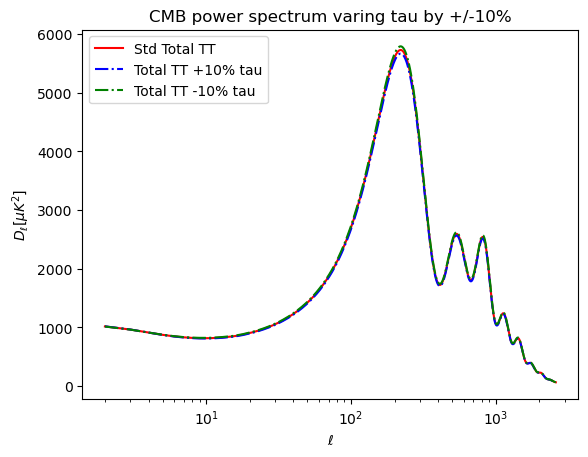

In [22]:
# Variang tau by +/-10%
tau_pars_plus  = camb.read_ini('https://raw.githubusercontent.com/cmbant/CAMB/master/inifiles/planck_2018.ini')
tau_pars_minus = camb.read_ini('https://raw.githubusercontent.com/cmbant/CAMB/master/inifiles/planck_2018.ini')
tau_pars_plus.Reion.optical_depth *= 110./100.
tau_pars_minus.Reion.optical_depth *= 90./100.

# Calculate results for these parameters
tau_results_plus = camb.get_results(tau_pars_plus)
tau_results_minus = camb.get_results(tau_pars_minus)

# Computing the CMB temperature power spectrum for the modified parameters
tau_powers_plus = tau_results_plus.get_cmb_power_spectra(tau_pars_plus, CMB_unit='muK')
tau_powers_minus = tau_results_minus.get_cmb_power_spectra(tau_pars_minus, CMB_unit='muK')

# Get the total CMB power spectrum
tau_totCL_plus = tau_powers_plus['total']
tau_totCL_minus = tau_powers_minus['total']

# Plot the CMB power spectrum
plt.figure()
plt.plot(ells[2:],std_totCL[2:,0], color='r', label='Std Total TT') # Taking from l=2 since l=0,1 are not physical
plt.plot(ells[2:],tau_totCL_plus[2:,0], color='b',ls = '-.',label='Total TT +10% tau')
plt.plot(ells[2:],tau_totCL_minus[2:,0], color='g',ls = '-.',label='Total TT -10% tau')
plt.legend()
plt.xlabel(r'$\ell$')
plt.xscale('log')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.title('CMB power spectrum varing tau by +/-10%')
plt.show()


**Varing tau in the Power Spectrum:** apparently, varing tau alters sligthtly the intensity of the perturbations as As would do. This implies that the 2 parameters are degenerate, i.e. it is possible to impose: 
$$
A_se^{-2\tau}=const
$$
and making varing the subspace of the 2 parameters.

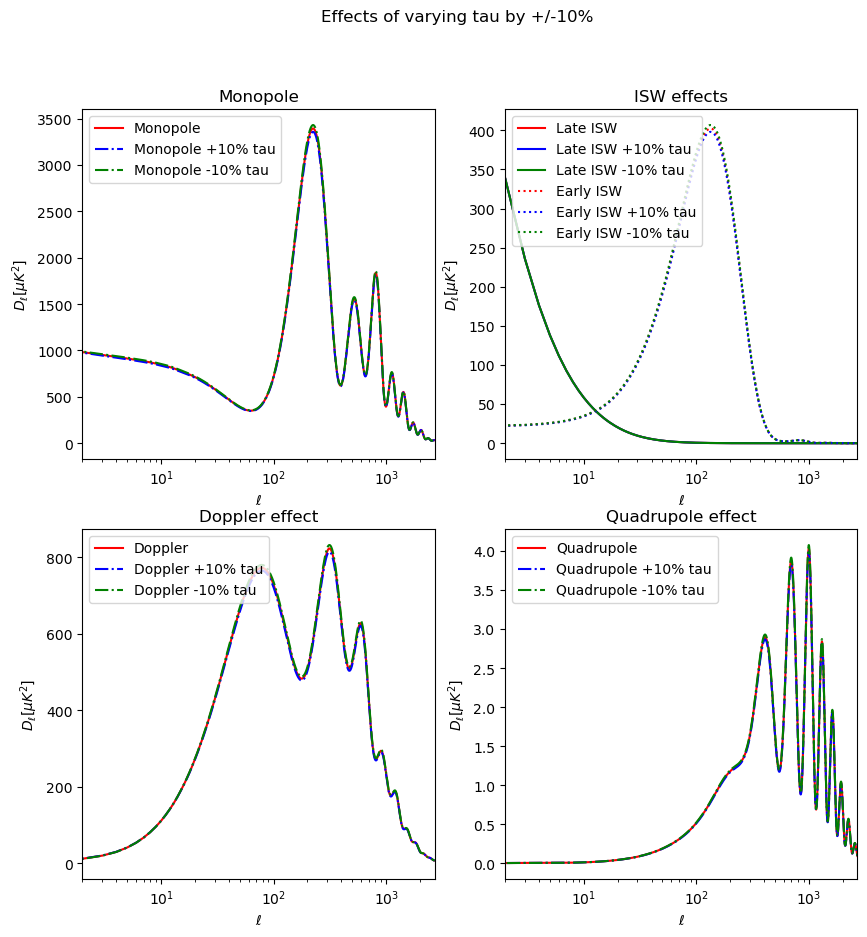

In [23]:
# PLots for the different effects having varied tau by +/-10%

tau_pars_plus.set_custom_scalar_sources([monopole_source, ISW,early_ISW, late_ISW,doppler,quadrupole_source],
        source_names =names)
tau_pars_minus.set_custom_scalar_sources([monopole_source, ISW,early_ISW, late_ISW,doppler,quadrupole_source],
        source_names =names)

tau_data_plus = camb.get_results(tau_pars_plus)
tau_data_minus = camb.get_results(tau_pars_minus)

tau_dic_plus  = tau_data_plus.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')
tau_dic_minus = tau_data_minus.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

# PLots for the different effects having varied tau by +/-10%


# Subplot for monopole
plt.subplots(2, 2, figsize=(10, 10))
plt.suptitle('Effects of varying tau by +/-10%')

plt.subplot(221)
plt.semilogx(ls,dic['monxmon'], color='r')
plt.semilogx(ls,tau_dic_plus['monxmon'], color='b',ls = '-.')
plt.semilogx(ls,tau_dic_minus['monxmon'], color='g',ls = '-.')
plt.xlabel('$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.xlim(2, ls[-1])
plt.legend(['Monopole','Monopole +10% tau','Monopole -10% tau'], loc = 'upper left')
plt.title('Monopole')

# Subplot for ISW effects
plt.subplot(222)
plt.semilogx(ls,dic['LISWxLISW'], color='r', ls = '-')
plt.semilogx(ls,tau_dic_plus['LISWxLISW'], color='b',ls = '-')
plt.semilogx(ls,tau_dic_minus['LISWxLISW'], color='g',ls = '-')
plt.semilogx(ls,dic['eISWxeISW'], ls=':', color='r')
plt.semilogx(ls,tau_dic_plus['eISWxeISW'], ls=':', color='b')
plt.semilogx(ls,tau_dic_minus['eISWxeISW'], ls=':', color='g')
plt.xlabel('$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.xlim(2, ls[-1])
plt.legend(['Late ISW','Late ISW +10% tau','Late ISW -10% tau','Early ISW','Early ISW +10% tau','Early ISW -10% tau'], loc = 'upper left')
plt.title('ISW effects')

# Subplot for Doppler effect
plt.subplot(223)
plt.semilogx(ls,dic['dopxdop'],color='r')
plt.semilogx(ls,tau_dic_plus['dopxdop'],color='b',ls = '-.')
plt.semilogx(ls,tau_dic_minus['dopxdop'],color='g',ls = '-.')
plt.xlabel('$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.xlim(2, ls[-1])
plt.legend(['Doppler','Doppler +10% tau','Doppler -10% tau'], loc = 'upper left')
plt.title('Doppler effect')

# Subplot for Quadrupole effect
plt.subplot(224)
plt.semilogx(ls,dic['QxQ'], color='r')
plt.semilogx(ls,tau_dic_plus['QxQ'], color='b',ls = '-.')
plt.semilogx(ls,tau_dic_minus['QxQ'], color='g',ls = '-.')
plt.xlabel('$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.xlim(2, ls[-1])
plt.legend(['Quadrupole','Quadrupole +10% tau','Quadrupole -10% tau'], loc = 'upper left')
plt.title('Quadrupole effect')

plt.show()

**Varing tau in the different effects of the Power Spectrum:** apparently, varing tau varies the amplitude of the different effect even if not much. 

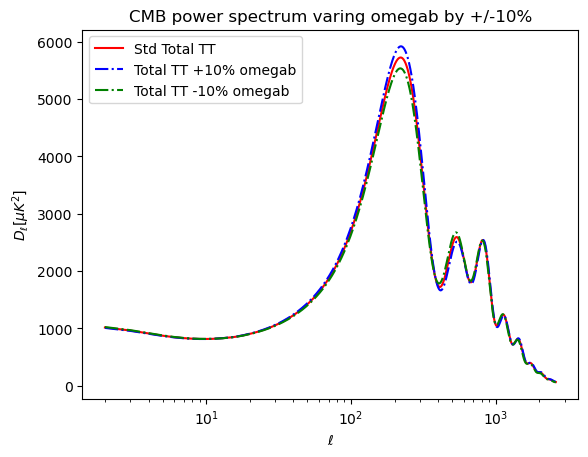

In [27]:
# Varing omegab by +/-30%
omegab_pars_plus  = camb.read_ini('https://raw.githubusercontent.com/cmbant/CAMB/master/inifiles/planck_2018.ini')
omegab_pars_minus = camb.read_ini('https://raw.githubusercontent.com/cmbant/CAMB/master/inifiles/planck_2018.ini')

omegab_pars_plus.ombh2 *= 130./100.
omegab_pars_minus.ombh2 *= 70./100.

# Calculate results for these parameters
omegab_results_plus = camb.get_results(omegab_pars_plus)
omegab_results_minus = camb.get_results(omegab_pars_minus)

# Computing the CMB temperature power spectrum for the modified parameters
omegab_powers_plus = omegab_results_plus.get_cmb_power_spectra(omegab_pars_plus, CMB_unit='muK')
omegab_powers_minus = omegab_results_minus.get_cmb_power_spectra(omegab_pars_minus, CMB_unit='muK')

# Get the total CMB power spectrum
omegab_totCL_plus = omegab_powers_plus['total']
omegab_totCL_minus = omegab_powers_minus['total']

# Plot the CMB power spectrum
plt.figure()
plt.plot(ells[2:],std_totCL[2:,0], color='r', label='Std Total TT') # Taking from l=2 since l=0,1 are not physical
plt.plot(ells[2:],omegab_totCL_plus[2:,0], color='b',ls = '-.',label='Total TT +30% omegab')
plt.plot(ells[2:],omegab_totCL_minus[2:,0], color='g',ls = '-.',label='Total TT -30% omegab')
plt.legend()
plt.xlabel(r'$\ell$')
plt.xscale('log')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.title('CMB power spectrum varing omegab by +/-30%')
plt.show()


**Varing omegabh2 in the Power Spectrum:** varing the baryon density parameter at 10% the effect is hardly visible. Otherwise at 30%, there are 2 notable effects: enhancing the matter density amplifies the first peak while dumps the second, diminushing the matter density dumps the first peak while enhance the second peak. This fenomena depend on the baryon loading effect and the variotion in the tight coupling between photons and baryons.

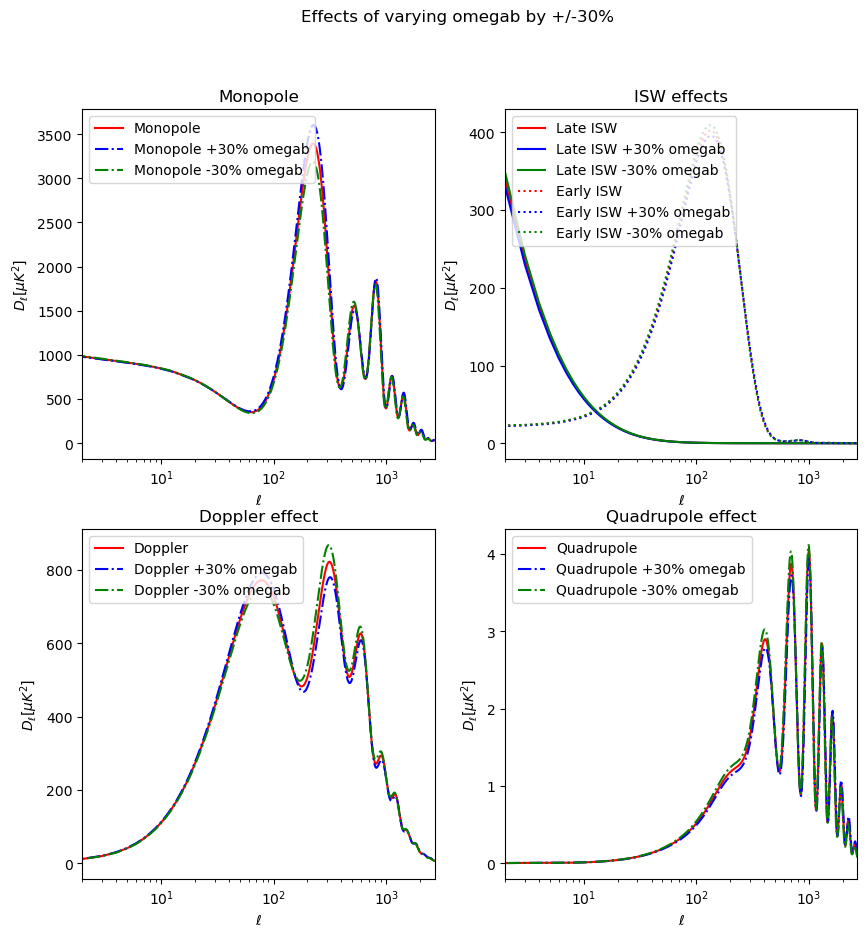

In [28]:
# PLots for the different effects having varied omegab by +/-30%

omegab_pars_plus.set_custom_scalar_sources([monopole_source, ISW,early_ISW, late_ISW,doppler,quadrupole_source],
        source_names =names)
omegab_pars_minus.set_custom_scalar_sources([monopole_source, ISW,early_ISW, late_ISW,doppler,quadrupole_source],
        source_names =names)

omegab_data_plus = camb.get_results(omegab_pars_plus)
omegab_data_minus = camb.get_results(omegab_pars_minus)

omegab_dic_plus  = omegab_data_plus.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')
omegab_dic_minus = omegab_data_minus.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

# PLots for the different effects having varied omegab by +/-30%

# Subplot for monopole
plt.subplots(2, 2, figsize=(10, 10))
plt.suptitle('Effects of varying omegab by +/-30%')

plt.subplot(221)
plt.semilogx(ls,dic['monxmon'], color='r')
plt.semilogx(ls,omegab_dic_plus['monxmon'], color='b',ls = '-.')
plt.semilogx(ls,omegab_dic_minus['monxmon'], color='g',ls = '-.')
plt.xlabel('$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.xlim(2, ls[-1])
plt.legend(['Monopole','Monopole +30% omegab','Monopole -30% omegab'], loc = 'upper left')
plt.title('Monopole')

# Subplot for ISW effects
plt.subplot(222)
plt.semilogx(ls,dic['LISWxLISW'], color='r', ls = '-')
plt.semilogx(ls,omegab_dic_plus['LISWxLISW'], color='b',ls = '-')
plt.semilogx(ls,omegab_dic_minus['LISWxLISW'], color='g',ls = '-')
plt.semilogx(ls,dic['eISWxeISW'], ls=':', color='r')
plt.semilogx(ls,omegab_dic_plus['eISWxeISW'], ls=':', color='b')
plt.semilogx(ls,omegab_dic_minus['eISWxeISW'], ls=':', color='g')
plt.xlabel('$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.xlim(2, ls[-1])
plt.legend(['Late ISW','Late ISW +30% omegab','Late ISW -30% omegab','Early ISW','Early ISW +30% omegab','Early ISW -30% omegab'], loc = 'upper left')
plt.title('ISW effects')

# Subplot for Doppler effect
plt.subplot(223)
plt.semilogx(ls,dic['dopxdop'],color='r')
plt.semilogx(ls,omegab_dic_plus['dopxdop'],color='b',ls = '-.')
plt.semilogx(ls,omegab_dic_minus['dopxdop'],color='g',ls = '-.')
plt.xlabel('$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.xlim(2, ls[-1])
plt.legend(['Doppler','Doppler +30% omegab','Doppler -30% omegab'], loc = 'upper left')
plt.title('Doppler effect')

# Subplot for Quadrupole effect
plt.subplot(224)
plt.semilogx(ls,dic['QxQ'], color='r')
plt.semilogx(ls,omegab_dic_plus['QxQ'], color='b',ls = '-.')
plt.semilogx(ls,omegab_dic_minus['QxQ'], color='g',ls = '-.')
plt.xlabel('$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.xlim(2, ls[-1])
plt.legend(['Quadrupole','Quadrupole +30% omegab','Quadrupole -30% omegab'], loc = 'upper left')
plt.title('Quadrupole effect')

plt.show()



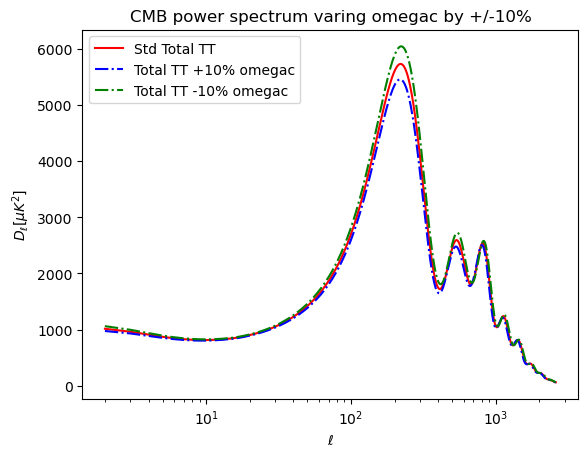

In [31]:
# Varing omegac by +/-10%
omegac_pars_plus  = camb.read_ini('https://raw.githubusercontent.com/cmbant/CAMB/master/inifiles/planck_2018.ini')
omegac_pars_minus = camb.read_ini('https://raw.githubusercontent.com/cmbant/CAMB/master/inifiles/planck_2018.ini')

omegac_pars_plus.omch2 *= 110./100.
omegac_pars_minus.omch2 *= 90./100.

# Calculate results for these parameters
omegac_results_plus = camb.get_results(omegac_pars_plus)
omegac_results_minus = camb.get_results(omegac_pars_minus)

# Computing the CMB temperature power spectrum for the modified parameters
omegac_powers_plus = omegac_results_plus.get_cmb_power_spectra(omegac_pars_plus, CMB_unit='muK')
omegac_powers_minus = omegac_results_minus.get_cmb_power_spectra(omegac_pars_minus, CMB_unit='muK')

# Get the total CMB power spectrum
omegac_totCL_plus = omegac_powers_plus['total']
omegac_totCL_minus = omegac_powers_minus['total']

# Plot the CMB power spectrum
plt.figure()
plt.plot(ells[2:],std_totCL[2:,0], color='r', label='Std Total TT') # Taking from l=2 since l=0,1 are not physical
plt.plot(ells[2:],omegac_totCL_plus[2:,0], color='b',ls = '-.',label='Total TT +10% omegac')
plt.plot(ells[2:],omegac_totCL_minus[2:,0], color='g',ls = '-.',label='Total TT -10% omegac')
plt.legend()
plt.xlabel(r'$\ell$')
plt.xscale('log')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.title('CMB power spectrum varing omegac by +/-10%')
plt.show()


**Varing omegach^2 in the Power Spectrum:** reducing omegac enhances the first few peaks, enhancing omegac diminushes the amplitude of the first few peaks, while higher peaks aren't altered. This effect might depend on the amplification/reduction of the radiation driving effect.

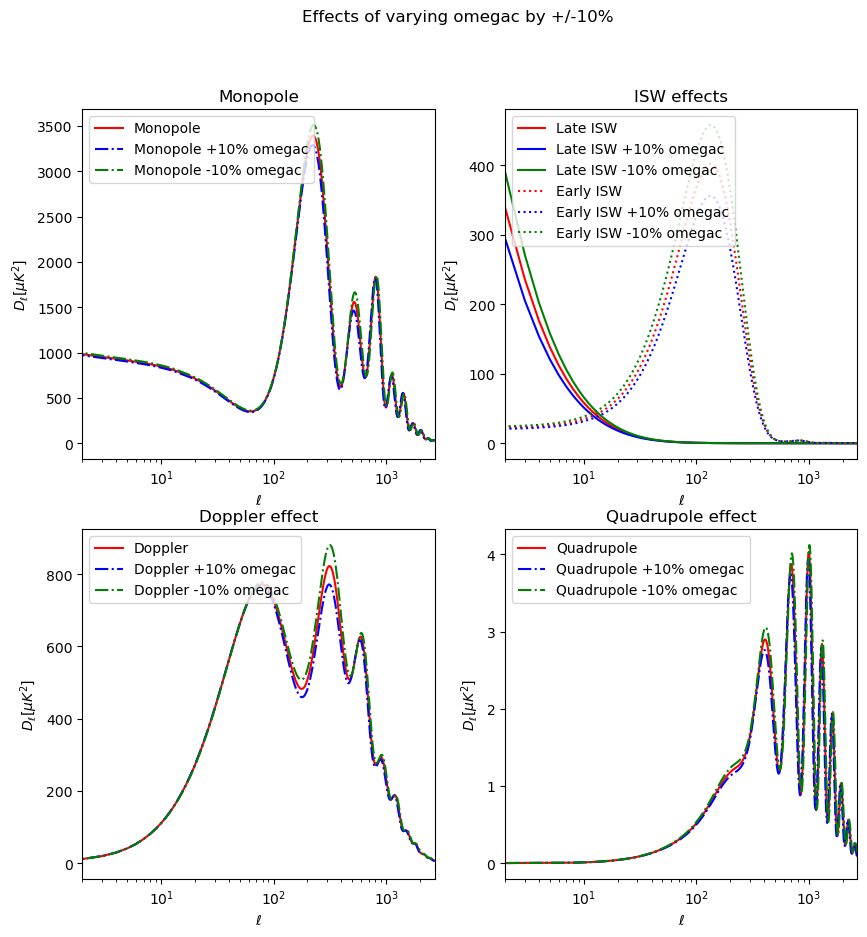

In [30]:
# PLots for the different effects having varied omegac by +/-10%

omegac_pars_plus.set_custom_scalar_sources([monopole_source, ISW,early_ISW, late_ISW,doppler,quadrupole_source],
        source_names =names)
omegac_pars_minus.set_custom_scalar_sources([monopole_source, ISW,early_ISW, late_ISW,doppler,quadrupole_source],
        source_names =names)

omegac_data_plus = camb.get_results(omegac_pars_plus)
omegac_data_minus = camb.get_results(omegac_pars_minus)

omegac_dic_plus  = omegac_data_plus.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')
omegac_dic_minus = omegac_data_minus.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

# PLots for the different effects having varied omegac by +/-10%

# Subplot for monopole
plt.subplots(2, 2, figsize=(10, 10))
plt.suptitle('Effects of varying omegac by +/-10%')

plt.subplot(221)
plt.semilogx(ls,dic['monxmon'], color='r')
plt.semilogx(ls,omegac_dic_plus['monxmon'], color='b',ls = '-.')
plt.semilogx(ls,omegac_dic_minus['monxmon'], color='g',ls = '-.')
plt.xlabel('$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.xlim(2, ls[-1])
plt.legend(['Monopole','Monopole +10% omegac','Monopole -10% omegac'], loc = 'upper left')
plt.title('Monopole')

# Subplot for ISW effects
plt.subplot(222)
plt.semilogx(ls,dic['LISWxLISW'], color='r', ls = '-')
plt.semilogx(ls,omegac_dic_plus['LISWxLISW'], color='b',ls = '-')
plt.semilogx(ls,omegac_dic_minus['LISWxLISW'], color='g',ls = '-')
plt.semilogx(ls,dic['eISWxeISW'], ls=':', color='r')
plt.semilogx(ls,omegac_dic_plus['eISWxeISW'], ls=':', color='b')
plt.semilogx(ls,omegac_dic_minus['eISWxeISW'], ls=':', color='g')
plt.xlabel('$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.xlim(2, ls[-1])
plt.legend(['Late ISW','Late ISW +10% omegac','Late ISW -10% omegac','Early ISW','Early ISW +10% omegac','Early ISW -10% omegac'], loc = 'upper left')
plt.title('ISW effects')

# Subplot for Doppler effect
plt.subplot(223)
plt.semilogx(ls,dic['dopxdop'],color='r')
plt.semilogx(ls,omegac_dic_plus['dopxdop'],color='b',ls = '-.')
plt.semilogx(ls,omegac_dic_minus['dopxdop'],color='g',ls = '-.')
plt.xlabel('$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.xlim(2, ls[-1])
plt.legend(['Doppler','Doppler +10% omegac','Doppler -10% omegac'], loc = 'upper left')
plt.title('Doppler effect')

# Subplot for Quadrupole effect
plt.subplot(224)
plt.semilogx(ls,dic['QxQ'], color='r')
plt.semilogx(ls,omegac_dic_plus['QxQ'], color='b',ls = '-.')
plt.semilogx(ls,omegac_dic_minus['QxQ'], color='g',ls = '-.')
plt.xlabel('$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.xlim(2, ls[-1])
plt.legend(['Quadrupole','Quadrupole +10% omegac','Quadrupole -10% omegac'], loc = 'upper left')
plt.title('Quadrupole effect')

plt.show()


**Varing omecach^2 in the different effects of the Power Spectrum:** analogous effects as for the general power spectrum, note that the increase of the early ISW increases the first peaks.